# Using NLP on Educational Reform Policies to Predict Educational Outcome
### Error Analysis

In [6]:
# Import Statements
import pandas as pd
import numpy as np
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load Data
final_df = pd.read_csv('../Data/final_pisa_werd_merged.csv')

In [4]:
# Best Word Embedding + Regression Model
final_df['tokens'] = final_df['reform_description_clean'].apply(lambda x: x.split())
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(final_df['tokens'])]
doc2vec_model = Doc2Vec(documents, vector_size=175, window=6, min_count=3, workers=4)
doc2vec_best = np.array([doc2vec_model.infer_vector(doc.words) for doc in documents])

X = doc2vec_best
y = final_df['Mean_Last_PISA_Score'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

best_xgb_model = xgb.XGBRegressor(colsample_bytree = 1.0, learning_rate = 0.1, max_depth = 9, min_child_weight = 1, n_estimators = 100, subsample = 0.7, random_state=42, n_jobs=-1)

best_xgb_model.fit(X_train, y_train)

y_pred = best_xgb_model.predict(X_test)

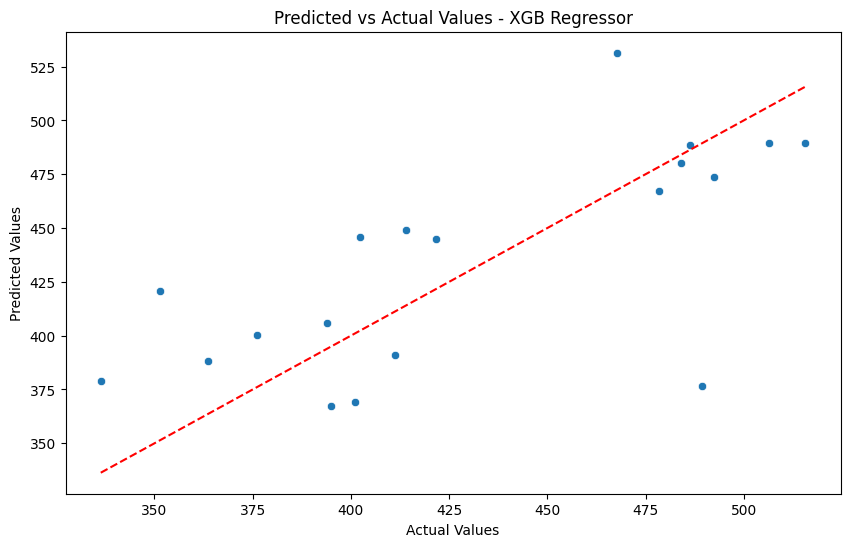

In [7]:
def plot_predicted_vs_actual(y_test, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Predicted vs Actual Values - XGB Regressor')
    plt.show()


plot_predicted_vs_actual(y_test, y_pred, best_xgb_model)
